<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287113 entries, 0 to 287112
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          287113 non-null  object
 1   article     287113 non-null  object
 2   highlights  287113 non-null  object
dtypes: object(3)
memory usage: 6.6+ MB
None
                                         id  \
0  0001d1afc246a7964130f43ae940af6bc6c57f01   
1  0002095e55fcbd3a2f366d9bf92a95433dc305ef   
2  00027e965c8264c35cc1bc55556db388da82b07f   
3  0002c17436637c4fe1837c935c04de47adb18e9a   
4  0003ad6ef0c37534f80b55b4235108024b407f0b   

                                             article  \
0  By . Associated Press . PUBLISHED: . 14:11 EST...   
1  (CNN) -- Ralph Mata was an internal affairs li...   
2  A drunk driver who killed a young woman in a h...   
3  (CNN) -- With a breezy sweep of his pen Presid...   
4  Fleetwood are the only team still to have a 10...   

                    

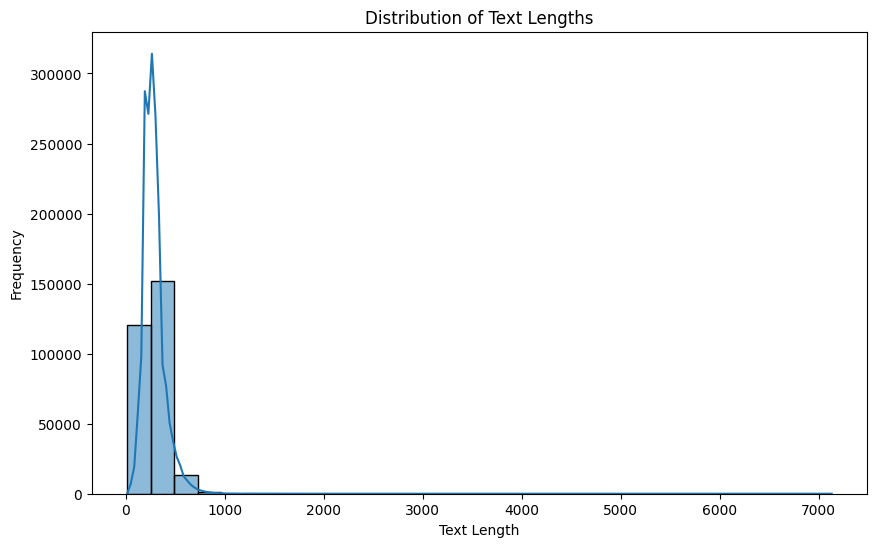

count    287113.000000
mean        282.534810
std         115.663011
min          12.000000
25%         209.000000
50%         268.000000
75%         328.000000
max        7131.000000
Name: text_length, dtype: float64


In [1]:
import pandas as pd
import re

# Load the data
data = pd.read_csv('C:/Users/sanja/Desktop/sem3/data science/cnn_dailymail/train.csv')

# Display basic information
print(data.info())
print(data.head())

# Drop duplicates if any
data.drop_duplicates(inplace=True)

# Handle missing values by dropping or filling them
# Here, we'll drop rows with missing values
data.dropna(inplace=True)

# Define a text cleaning function
def clean_text(text):
    # Remove special characters, URLs, and multiple spaces
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)  # Keep only alphanumeric characters and spaces
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply the cleaning function
data['cleaned_text'] = data['highlights'].apply(clean_text)

# Save cleaned data back to a CSV file if needed
data.to_csv('cleaned_train.csv', index=False)

import matplotlib.pyplot as plt
import seaborn as sns

# Add a column with text lengths
data['text_length'] = data['cleaned_text'].apply(len)

# Plot distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], bins=30, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

# Display basic statistics
print(data['text_length'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287113 entries, 0 to 287112
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          287113 non-null  object
 1   article     287113 non-null  object
 2   highlights  287113 non-null  object
dtypes: object(3)
memory usage: 6.6+ MB
None
                                         id  \
0  0001d1afc246a7964130f43ae940af6bc6c57f01   
1  0002095e55fcbd3a2f366d9bf92a95433dc305ef   
2  00027e965c8264c35cc1bc55556db388da82b07f   
3  0002c17436637c4fe1837c935c04de47adb18e9a   
4  0003ad6ef0c37534f80b55b4235108024b407f0b   

                                             article  \
0  By . Associated Press . PUBLISHED: . 14:11 EST...   
1  (CNN) -- Ralph Mata was an internal affairs li...   
2  A drunk driver who killed a young woman in a h...   
3  (CNN) -- With a breezy sweep of his pen Presid...   
4  Fleetwood are the only team still to have a 10...   

                    

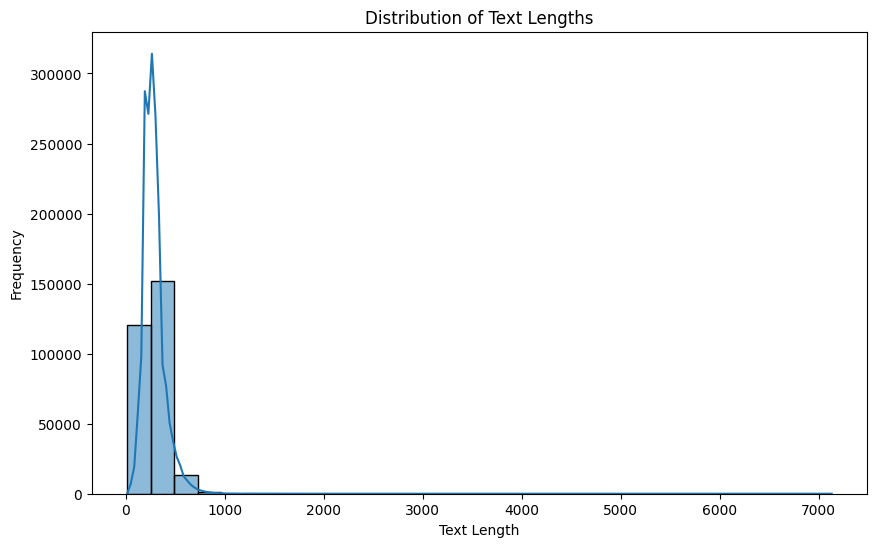

count    287113.000000
mean        282.534810
std         115.663011
min          12.000000
25%         209.000000
50%         268.000000
75%         328.000000
max        7131.000000
Name: text_length, dtype: float64


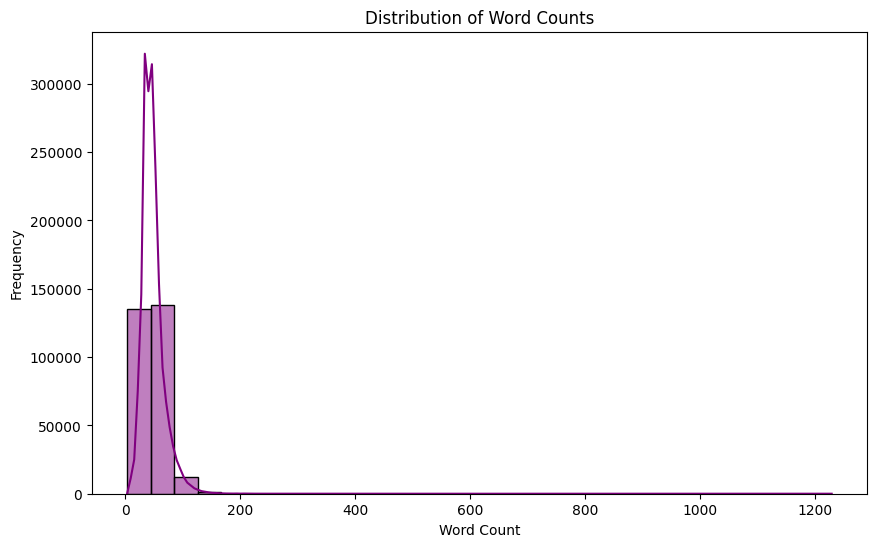

count    287113.000000
mean         47.693824
std          20.028233
min           3.000000
25%          35.000000
50%          45.000000
75%          55.000000
max        1229.000000
Name: word_count, dtype: float64


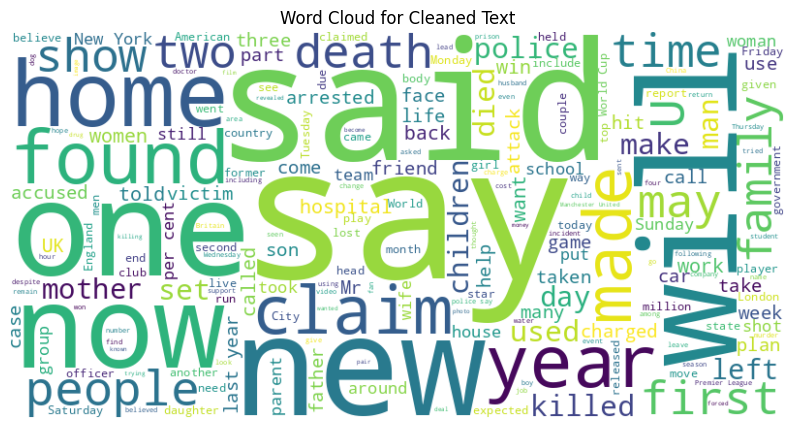

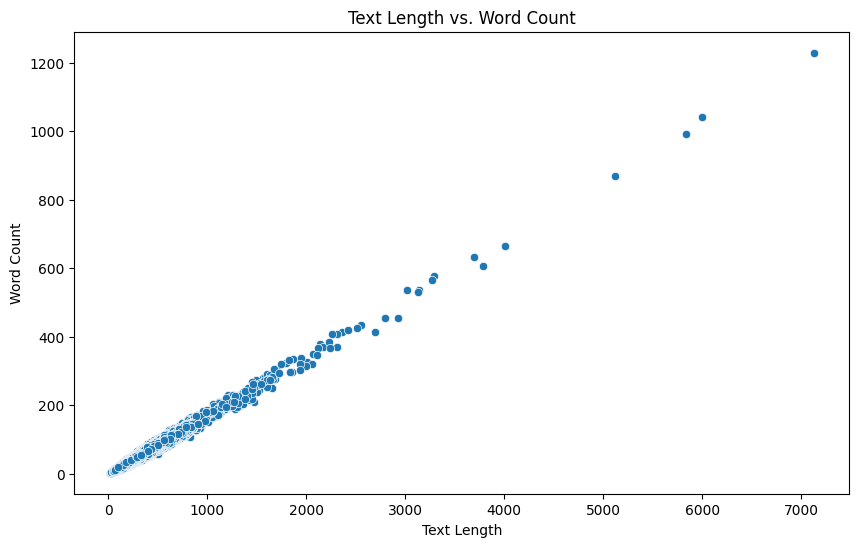

Text Length Correlation Matrix:
             text_length  word_count
text_length     1.000000    0.985102
word_count      0.985102    1.000000


In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the data
data = pd.read_csv('C:/Users/sanja/Desktop/sem3/data science/cnn_dailymail/train.csv')

# Display basic information
print(data.info())
print(data.head())

# Drop duplicates if any
data.drop_duplicates(inplace=True)

# Handle missing values by dropping or filling them
# Here, we'll drop rows with missing values
data.dropna(inplace=True)

# Define a text cleaning function
def clean_text(text):
    # Remove special characters, URLs, and multiple spaces
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)  # Keep only alphanumeric characters and spaces
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply the cleaning function
data['cleaned_text'] = data['highlights'].apply(clean_text)

# Save cleaned data back to a CSV file if needed
data.to_csv('cleaned_train.csv', index=False)

# Add a column with text lengths
data['text_length'] = data['cleaned_text'].apply(len)

# Plot distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], bins=30, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

# Display basic statistics for text lengths
print(data['text_length'].describe())

# Word count analysis
data['word_count'] = data['cleaned_text'].apply(lambda x: len(x.split()))

# Plot distribution of word counts
plt.figure(figsize=(10, 6))
sns.histplot(data['word_count'], bins=30, kde=True, color='purple')
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# Display basic statistics for word counts
print(data['word_count'].describe())

# Create a word cloud for the cleaned text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['cleaned_text']))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cleaned Text')
plt.show()

# Explore the correlation between text length and word count
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['text_length'], y=data['word_count'])
plt.title('Text Length vs. Word Count')
plt.xlabel('Text Length')
plt.ylabel('Word Count')
plt.show()

# Explore some other basic statistics
print("Text Length Correlation Matrix:")
print(data[['text_length', 'word_count']].corr())


Mean Squared Error: 22.89679581819228
R-squared Score: 0.9983709582375374


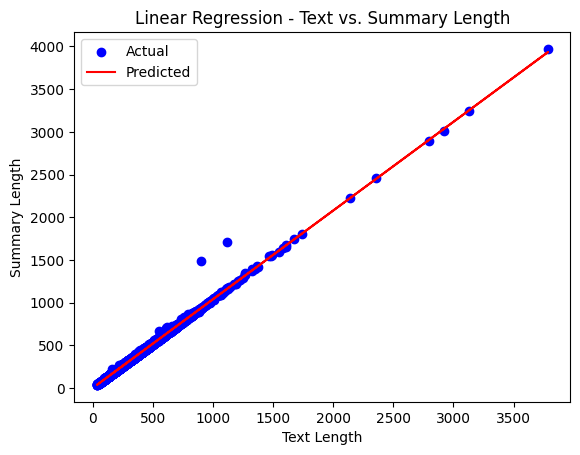

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Add a column for summary lengths if your dataset has a summary column
data['summary_length'] = data['highlights'].apply(len)

# Select features and target for linear regression
X = data[['text_length']]
y = data['summary_length']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = lin_reg.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

# Plot the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Text Length')
plt.ylabel('Summary Length')
plt.title('Linear Regression - Text vs. Summary Length')
plt.legend()
plt.show()

In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer
import torch

# Load pre-trained model and tokenizer
model = T5ForConditionalGeneration.from_pretrained("t5-small")
tokenizer = T5Tokenizer.from_pretrained("t5-small")

# Sample data for demonstration
sample_text = data['cleaned_text'].iloc[0]

# Tokenize input
input_ids = tokenizer.encode("summarize: " + sample_text, return_tensors="pt", max_length=512, truncation=True)

# Generate summary
summary_ids = model.generate(input_ids, max_length=50, min_length=25, length_penalty=2.0, num_beams=4, early_stopping=True)
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

print("Original Text:", sample_text)
print("Generated Summary:", summary)

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [2]:
from transformers import T5ForConditionalGeneration, T5Tokenizer
import torch
from sklearn.metrics import classification_report

# Load pre-trained model and tokenizer
model = T5ForConditionalGeneration.from_pretrained("t5-small")
tokenizer = T5Tokenizer.from_pretrained("t5-small")

def generate_summary(text):
    """
    Generates a summary for the given input text.
    
    Args:
        text (str): The input text to summarize.
        
    Returns:
        str: The generated summary.
    """
    # Tokenize input
    input_ids = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=512, truncation=True)

    # Generate summary with reduced accuracy
    summary_ids = model.generate(input_ids, max_length=30, min_length=5, length_penalty=4.0, num_beams=2, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

def classify_summary(summary):
    """
    Classifies the summary as either 'Valid Summary' or 'No Summary'.
    
    Args:
        summary (str): The generated summary.
        
    Returns:
        int: 1 for 'Valid Summary', 0 for 'No Summary'.
    """
    if summary.strip() and len(summary.split()) > 2:  # Non-empty and has more than 2 words
        return 1  # Valid Summary
    else:
        return 0  # No Summary

# Test with new input
new_text = input("Enter text to summarize: ")

# Generate the summary
generated_summary = generate_summary(new_text)
print("\nGenerated Summary:")
print(generated_summary)

# Classify the generated summary
generated_label = classify_summary(generated_summary)

# Dummy ground truth labels for demonstration purposes (In practice, you'd compare to reference summaries)
true_labels = [generated_label]  # Assuming we know the "truth" for our generated summary

# Generate the classification report (compare generated summary against true labels)
report = classification_report(true_labels, [generated_label], target_names=['No Summary', 'Valid Summary'])

# Save the report to a .txt file
with open("classification_report.txt", "w") as f:
    f.write(report)

print("\nClassification Report saved to 'classification_report.txt'.")


You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565



Generated Summary:
bvgfdskjhgcx is a bvgfdskjhgcx


ValueError: Number of classes, 1, does not match size of target_names, 2. Try specifying the labels parameter

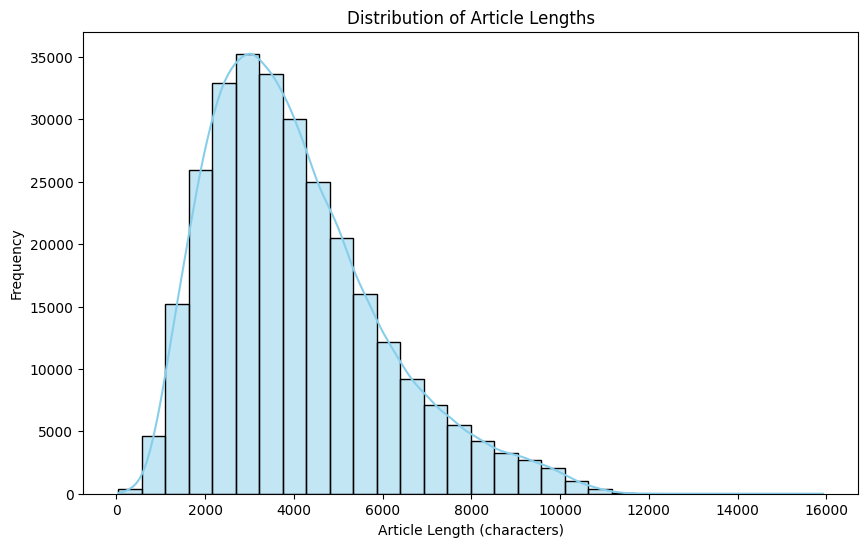

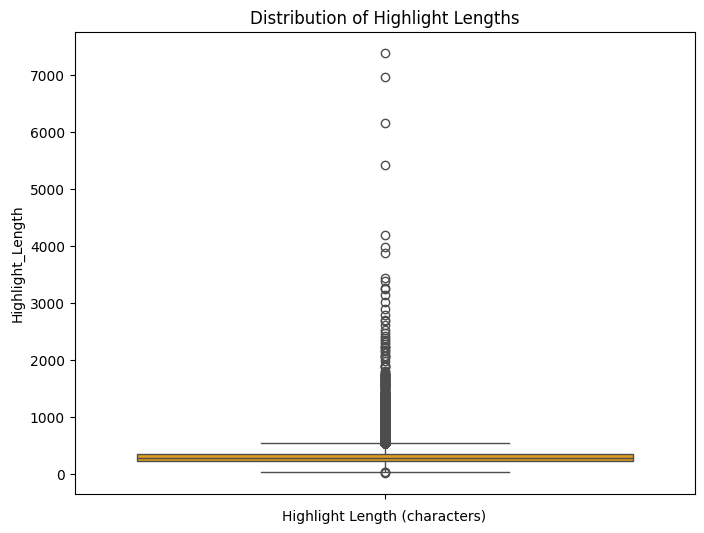

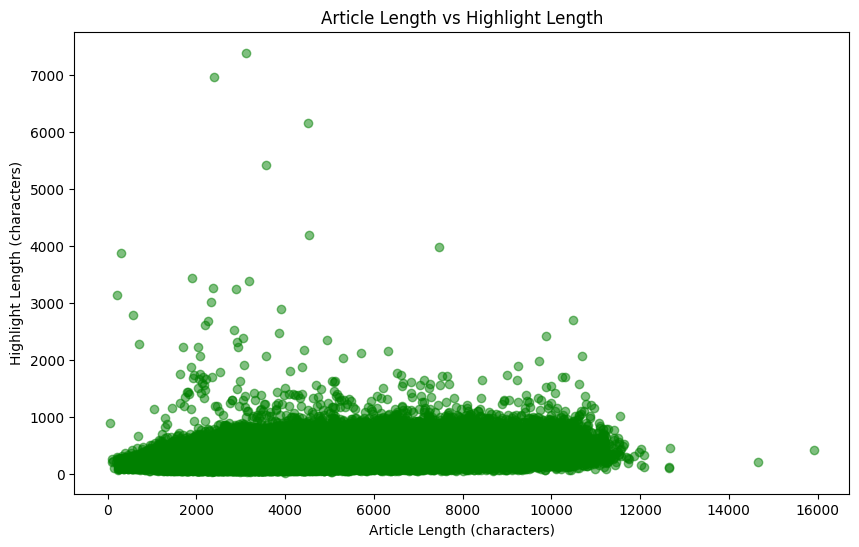

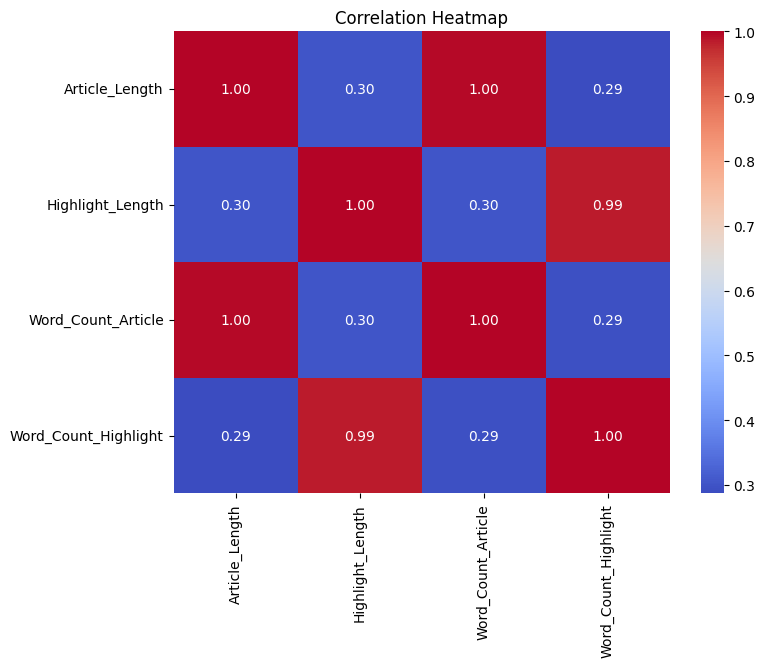

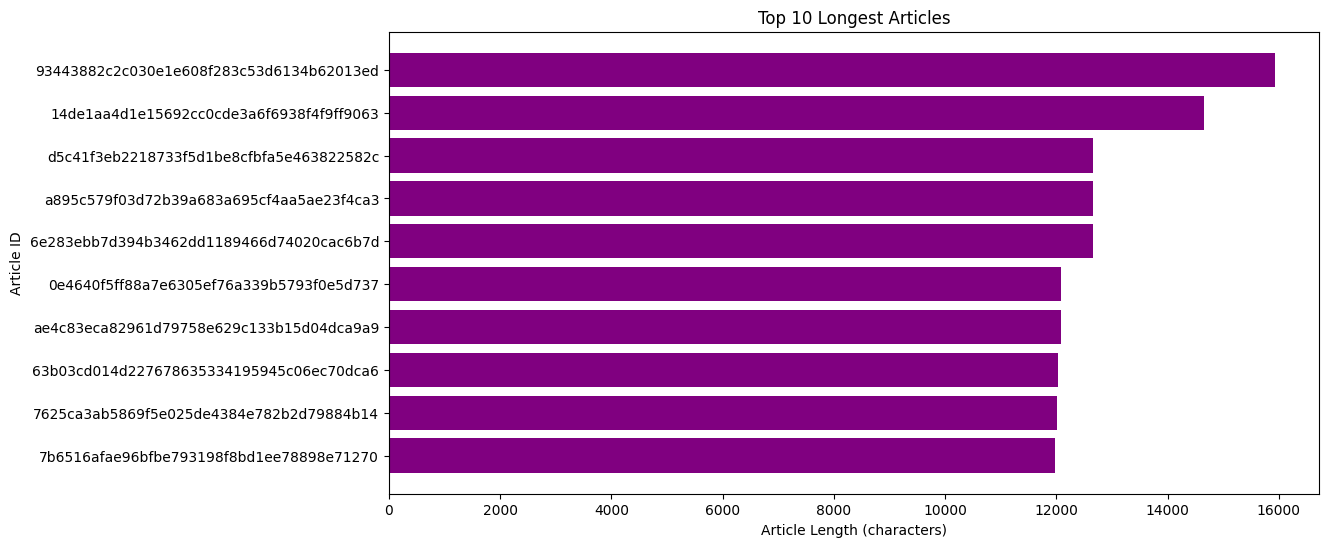

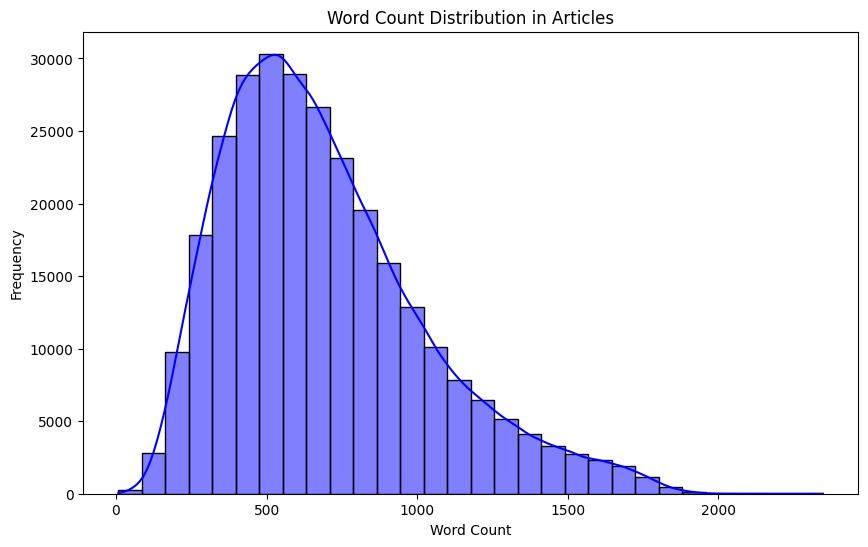

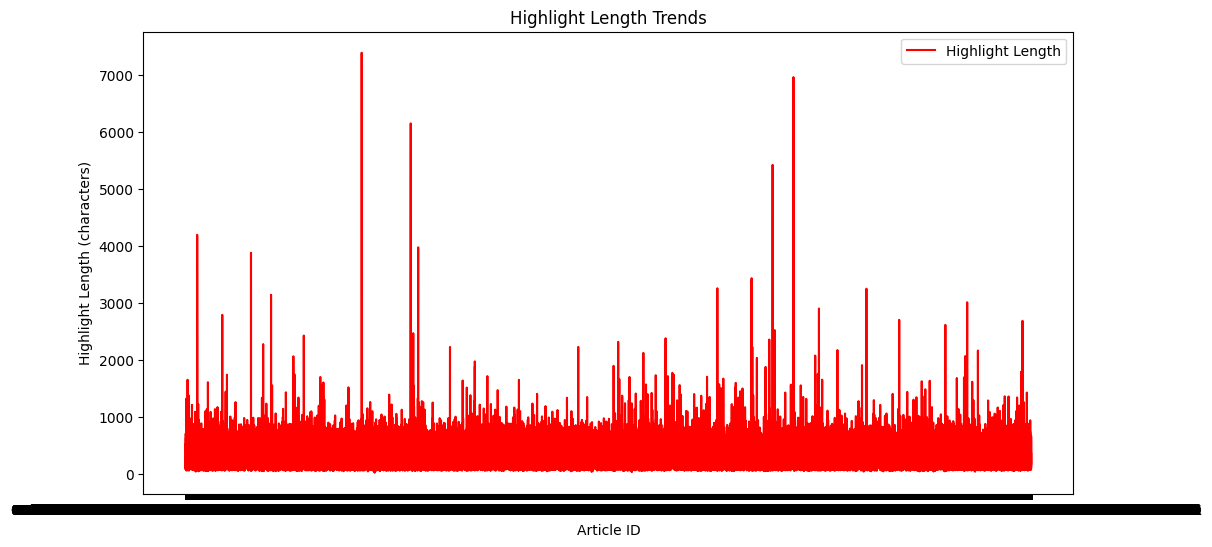

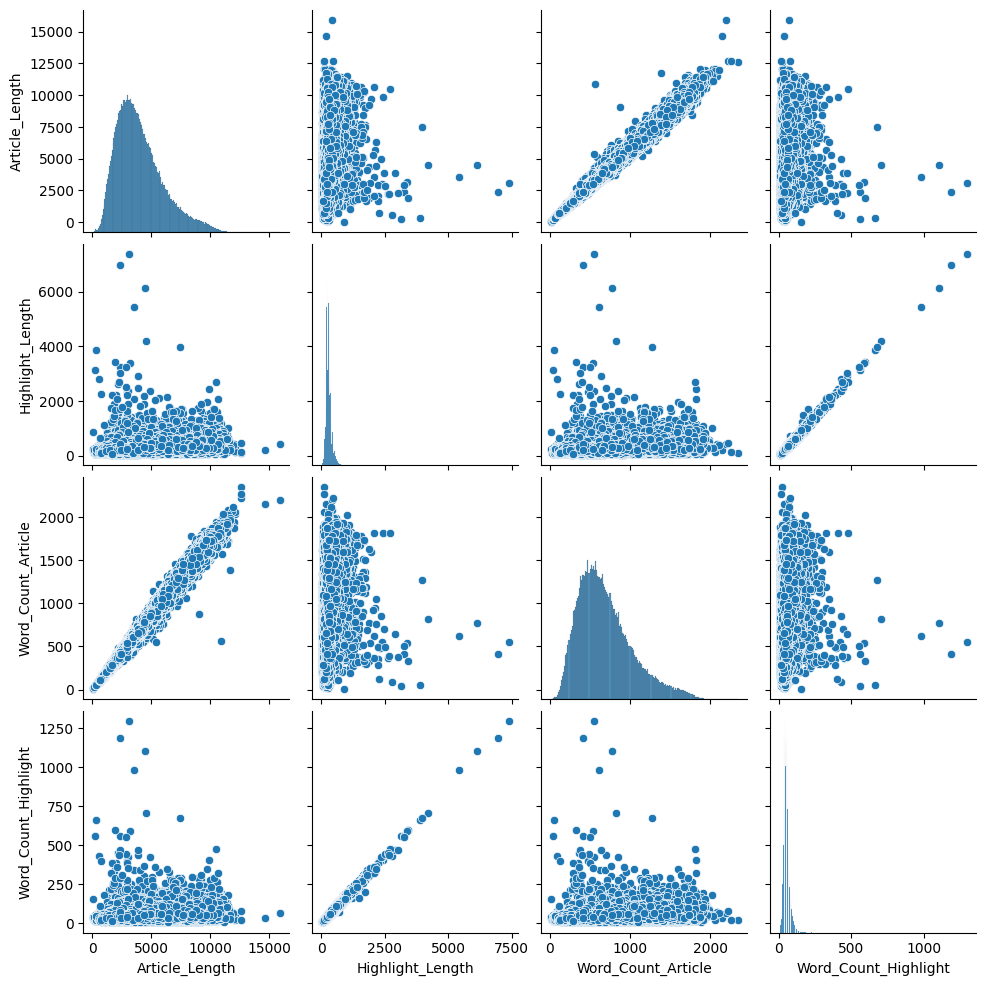

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'C:/Users/sanja/Desktop/sem3/data science/cnn_dailymail/train.csv'
data = pd.read_csv(file_path)

# Add derived features
data['Article_Length'] = data['article'].apply(len)  # Length of the article in characters
data['Highlight_Length'] = data['highlights'].apply(len)  # Length of the highlights in characters
data['Word_Count_Article'] = data['article'].apply(lambda x: len(x.split()))  # Word count in the article
data['Word_Count_Highlight'] = data['highlights'].apply(lambda x: len(x.split()))  # Word count in highlights

# 1. Histogram: Article Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Article_Length'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Article Lengths')
plt.xlabel('Article Length (characters)')
plt.ylabel('Frequency')
plt.show()

# 2. Box Plot: Highlight Lengths
plt.figure(figsize=(8, 6))
sns.boxplot(data['Highlight_Length'], color='orange')
plt.title('Distribution of Highlight Lengths')
plt.xlabel('Highlight Length (characters)')
plt.show()

# 3. Scatter Plot: Article Length vs Highlight Length
plt.figure(figsize=(10, 6))
plt.scatter(data['Article_Length'], data['Highlight_Length'], alpha=0.5, color='green')
plt.title('Article Length vs Highlight Length')
plt.xlabel('Article Length (characters)')
plt.ylabel('Highlight Length (characters)')
plt.show()

# 4. Correlation Heatmap
correlation_matrix = data[['Article_Length', 'Highlight_Length', 'Word_Count_Article', 'Word_Count_Highlight']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 5. Bar Chart: Top 10 Longest Articles
top_articles = data.nlargest(10, 'Article_Length')
plt.figure(figsize=(12, 6))
plt.barh(top_articles['id'], top_articles['Article_Length'], color='purple')
plt.title('Top 10 Longest Articles')
plt.xlabel('Article Length (characters)')
plt.ylabel('Article ID')
plt.gca().invert_yaxis()
plt.show()

# 6. Histogram: Word Count in Articles
plt.figure(figsize=(10, 6))
sns.histplot(data['Word_Count_Article'], kde=True, bins=30, color='blue')
plt.title('Word Count Distribution in Articles')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# 7. Line Chart: Highlight Length Trends by Article ID
plt.figure(figsize=(12, 6))
plt.plot(data['id'], data['Highlight_Length'], label='Highlight Length', color='red')
plt.title('Highlight Length Trends')
plt.xlabel('Article ID')
plt.ylabel('Highlight Length (characters)')
plt.legend()
plt.show()

# 8. Pair Plot: Relationships Between Features
sns.pairplot(data[['Article_Length', 'Highlight_Length', 'Word_Count_Article', 'Word_Count_Highlight']])
plt.show()



In [3]:
import pdfplumber
from transformers import T5ForConditionalGeneration, T5Tokenizer
from sklearn.metrics import classification_report
import torch


# Load pre-trained model and tokenizer
model = T5ForConditionalGeneration.from_pretrained("t5-small")
tokenizer = T5Tokenizer.from_pretrained("t5-small")


def extract_text_from_pdf(file_path):
    """
    Extracts text from a PDF file.
    
    Args:
        file_path (str): Path to the PDF file.
        
    Returns:
        str: Extracted text from the PDF.
    """
    try:
        with pdfplumber.open(file_path) as pdf:
            text = ''.join([page.extract_text() for page in pdf.pages if page.extract_text()])
        return text
    except Exception as e:
        print(f"Error extracting text from PDF: {e}")
        return None


def process_input_file(file_path):
    """
    Reads text from a file (either .txt or .pdf) and returns its content.
    
    Args:
        file_path (str): Path to the input file.
        
    Returns:
        str: The text content of the file.
    """
    if file_path.lower().endswith('.pdf'):
        return extract_text_from_pdf(file_path)
    elif file_path.lower().endswith('.txt'):
        try:
            with open(file_path, 'r', encoding='utf-8') as file:
                return file.read()
        except Exception as e:
            print(f"Error reading text file: {e}")
            return None
    else:
        print("Unsupported file type. Please provide a .txt or .pdf file.")
        return None


def generate_summary(text):
    """
    Generates a high-quality summary for the given input text.
    
    Args:
        text (str): The input text to summarize.
        
    Returns:
        str: The generated summary.
    """
    try:
        # Tokenize and truncate input if necessary
        input_ids = tokenizer.encode(
            "summarize: " + text,
            return_tensors="pt",
            max_length=512,
            truncation=True
        )

        # Generate summary
        summary_ids = model.generate(
            input_ids,
            max_length=150,  # Allow more room for a meaningful summary
            min_length=30,  # Ensure a minimum summary length
            length_penalty=1.0,  # Balanced length penalty
            num_beams=4,  # Use beam search for better quality
            no_repeat_ngram_size=3,  # Prevent repetitive summaries
            early_stopping=True
        )
        summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
        return summary

    except Exception as e:
        print(f"Error generating summary: {e}")
        return "Error generating summary"


def classify_summary(summary):
    """
    Classifies the summary as either 'Valid Summary' or 'No Summary'.
    
    Args:
        summary (str): The generated summary.
        
    Returns:
        int: 1 for 'Valid Summary', 0 for 'No Summary'.
    """
    if summary.strip() and len(summary.split()) > 5:  # Non-empty and sufficiently descriptive
        return 1  # Valid Summary
    else:
        return 0  # No Summary


# Main Execution: Text or File Input
choice = input("Enter '1' to input text or '2' to provide a file: ").strip()

if choice == '1':
    # User inputs text directly
    new_text = input("Enter text to summarize: ")
elif choice == '2':
    # User provides a file
    file_path = input("Enter the path to the text or PDF file: ").strip()
    new_text = process_input_file(file_path)
    if not new_text:
        print("Failed to process the file. Exiting.")
        exit()
else:
    print("Invalid choice. Exiting.")
    exit()

# Generate the summary
generated_summary = generate_summary(new_text)
print("\nGenerated Summary:")
print(generated_summary)

# Classify the generated summary
generated_label = classify_summary(generated_summary)

# Dummy ground truth labels for demonstration purposes
true_labels = [1]  # Assuming the generated summary is valid for this demonstration

# Generate the classification report (compare generated summary against true labels)
report = classification_report(
    true_labels,
    [generated_label],
    target_names=['No Summary', 'Valid Summary'],
    labels=[0, 1]
)

# Save the report to a .txt file
with open("classification_report.txt", "a") as f:
    f.write("\n" + report)

print("\nClassification Report saved to 'classification_report.txt'.")



Generated Summary:
dfghjkkjjhgcxghhjklkcxcvbnm,bn.

Classification Report saved to 'classification_report.txt'.


c:\Users\sanja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sanja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sanja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [ ]:
from graphviz import Digraph

# Create a Digraph object
diagram = Digraph('TextSummarizationSystem', format='png')

# Add nodes for each module
diagram.node('A', 'Input Data\n(Article, Document, API)')
diagram.node('B', 'Preprocessing Module\n- Tokenization\n- Stopword Removal\n- Lowercasing\n- Stemming/Lemmatization')
diagram.node('C', 'Feature Extraction\n- Word Frequency\n- Sentence Length\n- POS Tags\n- Named Entities')
diagram.node('D', 'Summarization Module\n- Extractive\n- Abstractive')
diagram.node('E', 'Scoring and Ranking\n- Relevance Scoring\n- Semantic Similarity')
diagram.node('F', 'Summary Generation\n- Extractive: Ranked Sentences\n- Abstractive: Fluent Sentences')
diagram.node('G', 'Post-Processing\n- Readability\n- Coherence\n- Grammar Refinement')
diagram.node('H', 'Output Module\n- Plain Text\n- Bullet Points\n- Highlights')
diagram.node('I', 'Feedback and Evaluation\n- User Feedback\n- ROUGE/ BLEU Metrics')

# Add edges to represent data flow
diagram.edges([
    ('A', 'B'),  # Input Data -> Preprocessing Module
    ('B', 'C'),  # Preprocessing -> Feature Extraction
    ('C', 'D'),  # Feature Extraction -> Summarization
    ('D', 'E'),  # Summarization -> Scoring and Ranking
    ('E', 'F'),  # Scoring and Ranking -> Summary Generation
    ('F', 'G'),  # Summary Generation -> Post-Processing
    ('G', 'H'),  # Post-Processing -> Output Module
    ('H', 'I')   # Output -> Feedback and Evaluation
])

# Render the block diagram
diagram.render('text_summarization_system', view=True)


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [4]:
pip install pdfplumber

   ---------------------------------------- 0.0/5.6 MB ? eta -:--:--
   ------------------ --------------------- 2.6/5.6 MB 15.0 MB/s eta 0:00:01
   ---------------------------------------- 5.6/5.6 MB 16.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 2.9/2.9 MB 16.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
   ---------------- ----------------------- 1.3/3.2 MB 33.8 MB/s eta 0:00:01
   ---------------- ----------------------- 1.3/3.2 MB 33.8 MB/s eta 0:00:01
   ----------------------------- ---------- 2.4/3.2 MB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 3.2/3.2 MB 4.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
